# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [9]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [14]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [19]:
# Create a Beautiful Soup Object
html = browser.html
soup=BeautifulSoup(html,'html.parser')

In [59]:
# Extract all rows of data
header_list=[]
header=soup.find_all('th')
for x in header:
    id = x.text.strip()
    header_list.append(id)
header_list

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [77]:
All_rows = soup.find_all('tr', class_ = 'data-row')
All_rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

In [37]:
# Find the table
table = soup.find('table')

# Extract headers
headers = [header.text.strip() for header in table.find_all('th')]

# Extract rows
rows = []
for row in table.find_all('tr')[1:]:  # Skip header row
    cols = row.find_all('td')
    row_data = [col.text.strip() for col in cols]
    rows.append(row_data)

# Convert to DataFrame
df = pd.DataFrame(rows, columns=headers)
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [93]:
# Create an empty list
rows = []
# Find the table
table = soup.find('table')

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr')[1:]:  # Skip header row
    cols = row.find_all('td')
    row_data = [col.text.strip() for col in cols]
    rows.append(row_data)

In [95]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows, columns=header_list)

In [97]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [103]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [108]:
# Change data types for data analysis
# Convert terrestrial_date to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert numerical columns to appropriate types
numeric_columns = ['id', 'sol', 'ls', 'month', 'pressure']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce', downcast='integer')

# Convert min_temp to float
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')

# Verify changes
print(df.dtypes)

id                           int16
terrestrial_date    datetime64[ns]
sol                          int16
ls                           int16
month                         int8
min_temp                   float64
pressure                     int16
dtype: object


In [ ]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [110]:
# 1. How many months are there on Mars?
print(df['month'].nunique())

12


In [112]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = df['sol'].nunique()  
print(f"There are {num_sols} sols worth of data.")

There are 1867 sols worth of data.


In [114]:
# 3. What is the average minimum temperature by month?
# Group by month and calculate the mean of min_temp
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Display results
print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


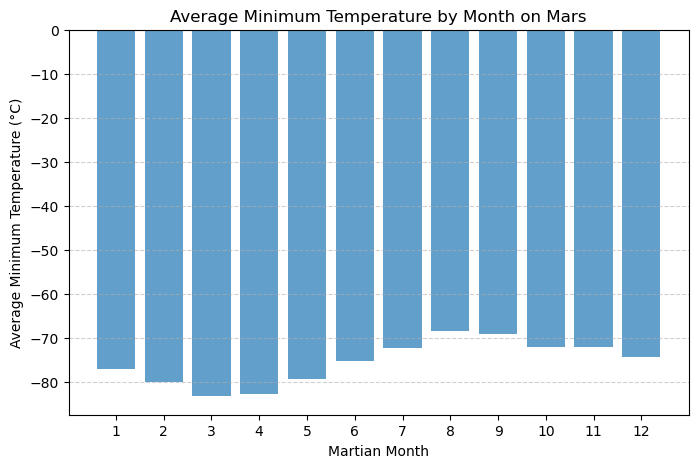

In [128]:
# Plot the average minimum temperature by month
# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(avg_min_temp_by_month.index, avg_min_temp_by_month.values,alpha=0.7)

# Add labels and title
plt.xlabel("Martian Month")
plt.ylabel("Average Minimum Temperature (°C)")
plt.title("Average Minimum Temperature by Month on Mars")
plt.xticks(range(1, 13))  # Ensure all 12 months are shown
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid lines for better readability

# Show the plot
plt.show()

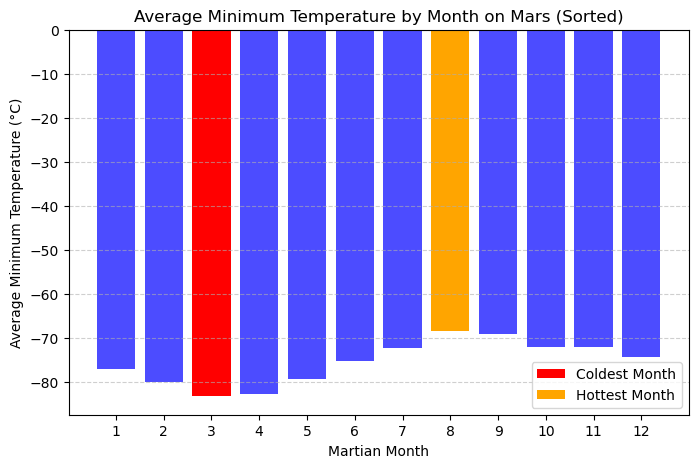

The coldest month is Month 3 with a temperature of -83.30729166666667°C.
The hottest month is Month 8 with a temperature of -68.38297872340425°C.


In [130]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the months by average minimum temperature (ascending order)
sorted_avg_min_temp = avg_min_temp_by_month.sort_values()

# Create the bar plot with sorted data
plt.figure(figsize=(8, 5))
plt.bar(sorted_avg_min_temp.index, sorted_avg_min_temp.values, color='blue', alpha=0.7)

# Highlight the coldest and hottest months
plt.bar(sorted_avg_min_temp.index[0], sorted_avg_min_temp.values[0], color='red', label='Coldest Month')
plt.bar(sorted_avg_min_temp.index[-1], sorted_avg_min_temp.values[-1], color='orange', label='Hottest Month')

# Add labels and title
plt.xlabel("Martian Month")
plt.ylabel("Average Minimum Temperature (°C)")
plt.title("Average Minimum Temperature by Month on Mars (Sorted)")
plt.xticks(range(1, 13))  # Ensure all 12 months are shown
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid lines for better readability

# Add legend for clarity
plt.legend()

# Show the plot
plt.show()

# Print the coldest and hottest months with their temperatures
coldest_month = sorted_avg_min_temp.idxmin()
hottest_month = sorted_avg_min_temp.idxmax()
print(f"The coldest month is Month {coldest_month} with a temperature of {sorted_avg_min_temp.min()}°C.")
print(f"The hottest month is Month {hottest_month} with a temperature of {sorted_avg_min_temp.max()}°C.")

In [132]:
# 4. What is the average pressure by month?
# Group by month and calculate the mean of pressure
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Display results
print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


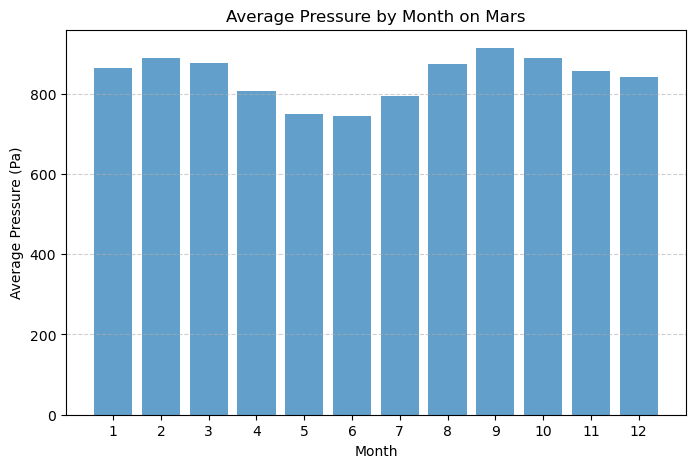

In [140]:
# Plot the average pressure by month
# Create the bar plot for average pressure
plt.figure(figsize=(8, 5))
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month.values, alpha=0.7)

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Average Pressure (Pa)")
plt.title("Average Pressure by Month on Mars")
plt.xticks(range(1, 13))  # Ensure all 12 months are shown
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid lines for better readability

# Show the plot
plt.show()

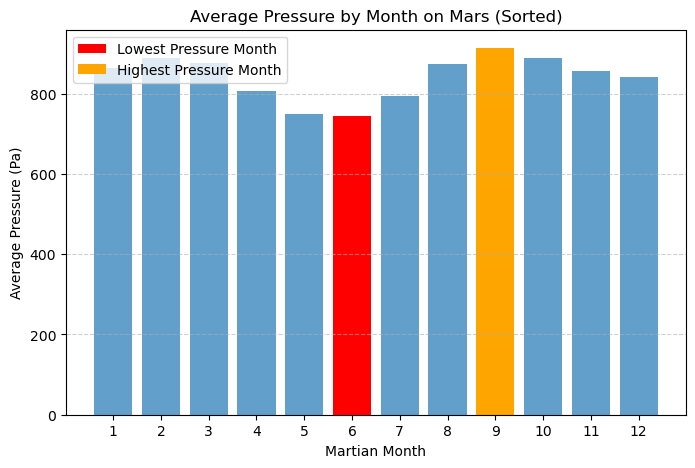

The lowest pressure month is Month 6 with a pressure of 745.0544217687075 Pa.
The highest pressure month is Month 9 with a pressure of 913.3059701492538 Pa.


In [146]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Create the bar plot with sorted data
plt.figure(figsize=(8, 5))
plt.bar(sorted_avg_pressure.index, sorted_avg_pressure.values, alpha=0.7)

# Highlight the lowest and highest pressure months
plt.bar(sorted_avg_pressure.index[0], sorted_avg_pressure.values[0], color='red', label='Lowest Pressure Month')
plt.bar(sorted_avg_pressure.index[-1], sorted_avg_pressure.values[-1], color='orange', label='Highest Pressure Month')

# Add labels and title
plt.xlabel("Martian Month")
plt.ylabel("Average Pressure (Pa)")
plt.title("Average Pressure by Month on Mars (Sorted)")
plt.xticks(range(1, 13))  # Ensure all 12 months are shown
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid lines for better readability

# Add legend for clarity
plt.legend()

# Show the plot
plt.show()

# Print the lowest and highest pressure months with their pressures
lowest_pressure_month = sorted_avg_pressure.idxmin()
highest_pressure_month = sorted_avg_pressure.idxmax()
print(f"The lowest pressure month is Month {lowest_pressure_month} with a pressure of {sorted_avg_pressure.min()} Pa.")
print(f"The highest pressure month is Month {highest_pressure_month} with a pressure of {sorted_avg_pressure.max()} Pa.")

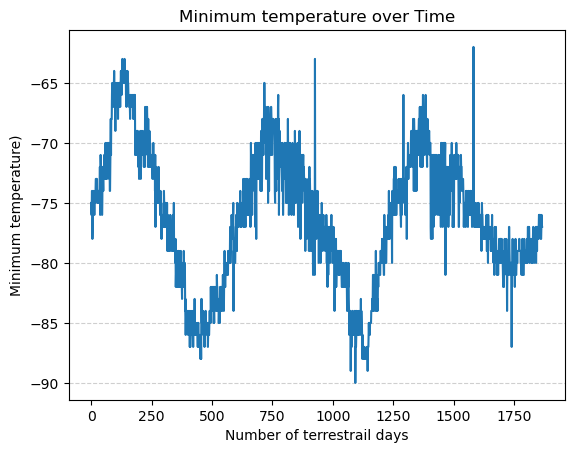

In [160]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Ensure 'terrestrial_date' is in datetime format
df['min_temp'].plot()
# Add labels and title
plt.xlabel("Number of terrestrail days")
plt.ylabel("Minimum temperature)")
plt.title("Minimum temperature over Time")
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid lines for better readability

# Show the plot
plt.show()

#### Minimum Temperature
From the analysis it's found that the third month has the coldest minimum temperature on Mars, and the eighth month is the hottest. 

#### Atmospheric Pressure
Data analysis showed that atmospheric pressure is lowest in the sixth month which is 745.05pa and highest which is 913.30 pa in the ninth month.

#### Year Length
A Martian year consists of 668 sols (Martian days), and each sol is approximately 1.027 Earth days long. Hence, the length of a Martian year can be calculated as:

Martian Year in Earth Days
= 668 sols ×1.027
 
Earth days/sol≈687
 
Earth days
Martian Year in Earth Days=668sols×1.027Earth days/sol≈687Earth days

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [162]:
# Write the data to a CSV
df.to_csv('mars_temperature_data.csv', index=False)

In [166]:
browser.quit()